In [1]:
from surprise import SVDpp
from surprise import SVD
from surprise import Dataset
from surprise import Reader
from surprise import accuracy
from surprise.model_selection import train_test_split
from surprise.model_selection import GridSearchCV
from surprise.model_selection import cross_validate

In [2]:
import pandas as pd
df=pd.read_csv("C:\\Users\\Aakash\\Desktop\\Projects\\ml-100k\\u.data")

In [3]:
df.head() #FORMAT::::USER ITEM READING TIMESTAMP

,196\t242\t3\t881250949
0,186\t302\t3\t891717742
1,22\t377\t1\t878887116
2,244\t51\t2\t880606923
3,166\t346\t1\t886397596
4,298\t474\t4\t884182806


In [4]:
# Use movielens-100K
reader = Reader(line_format='user item rating timestamp', sep='\t')
data = Dataset.load_from_file("C:\\Users\\Aakash\\Desktop\\Projects\\ml-100k\\u.data",reader=reader)

# data = Dataset.load_builtin('ml-100k')
trainset, testset = train_test_split(data, test_size=.15)

# ----- SVD ----- # 

rmse_dict = {}
for i in range (0,100,5):
    algo = SVD(n_factors=160, n_epochs=int(i), lr_all=0.005, reg_all=0.1) # Setting up the SVD algorithm using hyperparameters.
    algo.fit(trainset)
    test_pred = algo.test(testset)
    rmse_dict[i] = accuracy.rmse(test_pred, verbose=True)
    
# print("SVD : Test Set")
# accuracy.rmse(test_pred, verbose=True)

RMSE: 1.1318
RMSE: 0.9569
RMSE: 0.9453
RMSE: 0.9387
RMSE: 0.9333
RMSE: 0.9261
RMSE: 0.9213
RMSE: 0.9173
RMSE: 0.9120
RMSE: 0.9111
RMSE: 0.9095
RMSE: 0.9072
RMSE: 0.9076
RMSE: 0.9060
RMSE: 0.9043
RMSE: 0.9055
RMSE: 0.9048
RMSE: 0.9045
RMSE: 0.9036
RMSE: 0.9032


In [5]:
print("Number of items %s"%(data.build_full_trainset().n_items)) # number of rows
print("Number of users %s"%(data.build_full_trainset().n_users)) # number of columns
print("Number of ratings %s"%(data.build_full_trainset().n_ratings)) # non empty cells in the utility matrix
sparsity  = 1-((data.build_full_trainset().n_ratings)/(data.build_full_trainset().n_items*data.build_full_trainset().n_users))
print("sparsity of data is %s"%(sparsity))

Number of items 1682
Number of users 943
Number of ratings 100000
sparsity of data is 0.9369533063577546


In [6]:
from surprise.model_selection import GridSearchCV

param_grid = {'n_factors':[50,100,150],'n_epochs':[20,30],  'lr_all':[0.005,0.01],'reg_all':[0.02,0.1]}

gs = GridSearchCV(SVD, param_grid, measures=['rmse'], cv=3)
gs.fit(data)
params = gs.best_params['rmse']
svdtuned = SVD(n_factors=params['n_factors'], n_epochs=params['n_epochs'],lr_all=params['lr_all'], reg_all=params['reg_all'])
svdtuned.fit(trainset)
test_pred = algo.test(testset)
rmse_dict[i] = accuracy.rmse(test_pred, verbose=True)                                                                                                                  
                                                                                                                  

RMSE: 0.9032


## As seen above Gridsearchcv does hyperparameter optimisation better than manual tuning

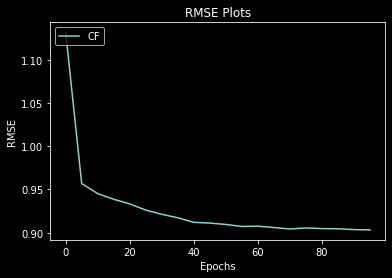

In [7]:
import matplotlib.pylab as plt
from matplotlib import style
style.use('dark_background')
plt.xlabel('Epochs')
plt.ylabel('RMSE')
plt.title("RMSE Plots")


lists = sorted(rmse_dict.items()) # sorted by key, return a list of tuples
x, y = zip(*lists) # unpack a list of pairs into two tuples


plt.plot(x, y)

plt.legend(['CF'], loc='upper left')
plt.show()

In [8]:
from surprise import KNNBasic
from surprise import Dataset
from surprise import Reader
import os
from surprise import NMF

#------------------------load data from a file
file_path = os.path.expanduser('C:\\Users\\Aakash\\Desktop\\Projects\\ml-100k\\u.data')
reader = Reader(line_format='user item rating timestamp', sep='\t')
data = Dataset.load_from_file(file_path, reader=reader)


In [9]:
from surprise import SVD
from surprise.model_selection import cross_validate
import os

In [10]:
#########---------------SVD
print('')
print('---------------SVD result-------------')

algo = SVD()
cross_validate(algo, data, measures=['RMSE', 'MAE'], cv=5, verbose=True)



#########---------------PMF
print('')
print('---------------PMF result--------------')

algo = SVD(biased=False)
cross_validate(algo, data, measures=['RMSE', 'MAE'], cv=5, verbose=True)



##########--------MSD------User Based Collaborative Filtering algorithm
print('')
print('15--Neighboors--User Based Collaborative Filtering algorithm result')

algo = KNNBasic(k=10, sim_options = {'name':'MSD', 'user_based':True })
cross_validate(algo, data, measures=['RMSE', 'MAE'], cv=5, verbose=True)




---------------SVD result-------------
Evaluating RMSE, MAE of algorithm SVD on 5 split(s).

                  Fold 1  Fold 2  Fold 3  Fold 4  Fold 5  Mean    Std     
RMSE (testset)    0.9398  0.9410  0.9288  0.9314  0.9378  0.9358  0.0048  
MAE (testset)     0.7414  0.7427  0.7333  0.7354  0.7366  0.7379  0.0036  
Fit time          3.72    3.69    3.55    3.64    3.71    3.66    0.06    
Test time         0.11    0.14    0.10    0.14    0.10    0.12    0.02    

---------------PMF result--------------
Evaluating RMSE, MAE of algorithm SVD on 5 split(s).

                  Fold 1  Fold 2  Fold 3  Fold 4  Fold 5  Mean    Std     
RMSE (testset)    0.9493  0.9512  0.9401  0.9493  0.9517  0.9483  0.0042  
MAE (testset)     0.7469  0.7482  0.7421  0.7472  0.7512  0.7471  0.0029  
Fit time          3.65    3.61    3.56    3.70    3.55    3.61    0.06    
Test time         0.12    0.12    0.10    0.12    0.09    0.11    0.01    

15--Neighboors--User Based Collaborative Filtering algorithm

{'test_rmse': array([0.97840783, 0.98793174, 0.9901446 , 0.98894234, 0.99018408]),
 'test_mae': array([0.77015636, 0.78068167, 0.77901275, 0.78017449, 0.78069309]),
 'fit_time': (0.4507937431335449,
  0.385967493057251,
  0.38796234130859375,
  0.3849787712097168,
  0.3839724063873291),
 'test_time': (1.8350911140441895,
  1.6585633754730225,
  1.6386165618896484,
  1.6934599876403809,
  1.6735239028930664)}